In [2]:

# import Required libraryes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data
data=pd.read_csv("D:\github-d\AI-ML\Datasets\Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Make sure data with out missing or null values
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
# Seperate data as X and y 

X=data.drop(['Salary','Position'],axis=1).values
y=data['Salary'].values
X,y
X,y


(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

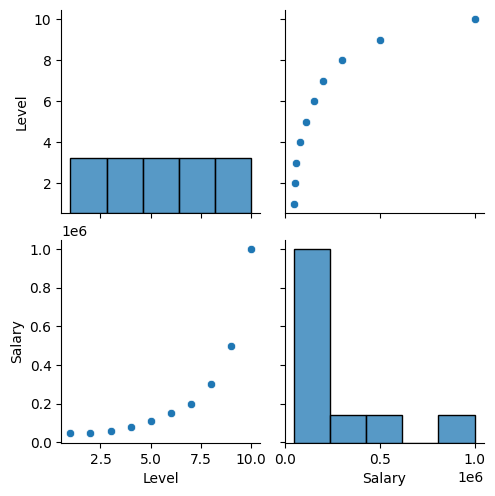

In [6]:
sns.pairplot(data)

In [7]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)

x_poly=poly.fit_transform(X)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression()

In [10]:
y_pred=lr.predict(x_poly)
y_pred

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

Text(0, 0.5, 'Salary')

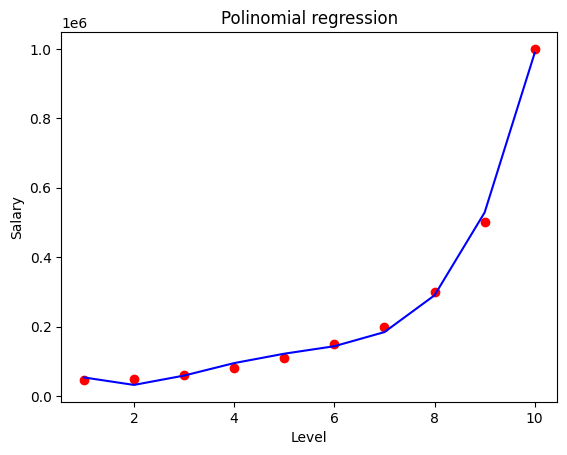

In [11]:

plt.scatter(X,y,c='red')
plt.plot(X,lr.predict(poly.fit_transform(X)),c='blue')
plt.title('Polinomial regression')
plt.xlabel('Level')
plt.ylabel('Salary')
#plt.show()

In [18]:
per3=lr.predict(poly.fit_transform([[3]]))
per3

array([58642.1911421])

In [22]:
pr=pd.DataFrame()
pr['actual']=y
pr['predicted']=y_pred
pr

,actual,predicted
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


In [23]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9973922891706614

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
yhat=lr.predict(X)
yhat

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [27]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.6690412331929895

Text(0, 0.5, 'Salary')

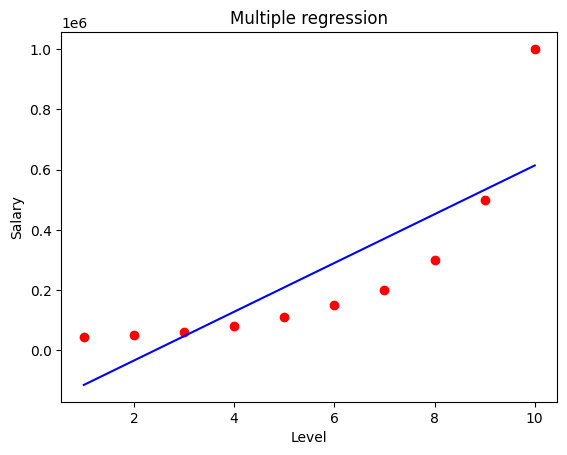

In [29]:
plt.scatter(X,y,c='red')
plt.plot(X,y_pred,c='blue')
plt.title('Multiple regression')
plt.xlabel('Level')
plt.ylabel('Salary')
#plt.show()